## Comparing three different models 

In [ ]:
print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded,isDisaster_test)}")
print(f"LSTM architecture loss and accuracy: {model1.evaluate(testing_padded,isDisaster_test)}")
print(f"Bi-LSTM architecture loss and accuracy: {model2.evaluate(testing_padded,isDisaster_test)}")

41/41 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7823
Dense architecture loss and accuracy: [0.48138561844825745, 0.7822765707969666]
41/41 [==============================] - 0s 8ms/step - loss: 0.5129 - accuracy: 0.7618
LSTM architecture loss and accuracy: [0.5128971338272095, 0.7618436217308044]
41/41 [==============================] - 0s 12ms/step - loss: 0.4982 - accuracy: 0.7748
Bi-LSTM architecture loss and accuracy: [0.49822694063186646, 0.7747899293899536]


:We uses a bar plot to help with the visualisation of our results. Hence, by sorting the data to be shown in an ascending order in the bar plot, our results show that out of the three models, the dense model have provided us with the best accuracy result. 

41/41 [==============================] - 0s 11ms/step - loss: 0.4982 - accuracy: 0.7748


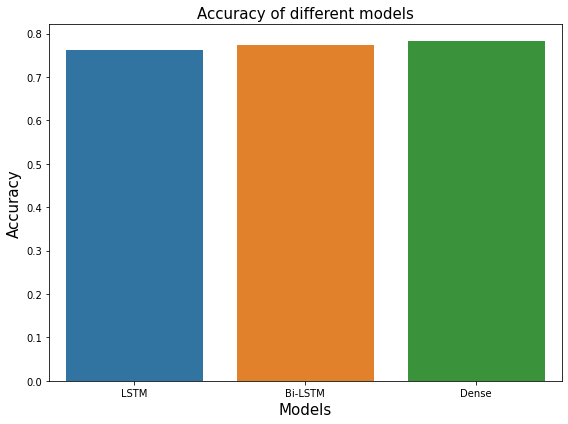

In [ ]:
# Visualisation to compare the different 3 models in terms of their accuracy 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as isDisaster_tweets_numpy
import seaborn as sns

Dense_loss,Dense_accuracy = model.evaluate(testing_padded,isDisaster_test)
LSTM_loss,LSTM_accuracy = model1.evaluate(testing_padded,isDisaster_test)
BiLSTM_loss,BiLSTM_accuracy = model2.evaluate(testing_padded,isDisaster_test)

models = ['Dense','LSTM','Bi-LSTM']
accuracy = [Dense_accuracy,LSTM_accuracy,BiLSTM_accuracy]

df = pd.DataFrame({"Models":models,"Accuracy":accuracy})
df

plt.figure(figsize=(8,6))
sns.barplot(x='Models',y="Accuracy",data=df,order=df.sort_values('Accuracy').Models)
plt.xlabel("Models",size = 15)
plt.ylabel("Accuracy",size = 15)
plt.title("Accuracy of different models",size = 15)
plt.tight_layout()


## Other methods: Decision Tree Classifier
---
Decision Tree is a supervised machine learning algorithm, that is similar to how humans make decisions. 

Here, we used the decision tree to obtain results for classification. The intuiton behind it is that we train our data to predict their outputs. 

Here, we create a decision tree of max_depth 4 and obtain our results as shown by the confusion metrics.



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6139881521115995

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5752482811306341



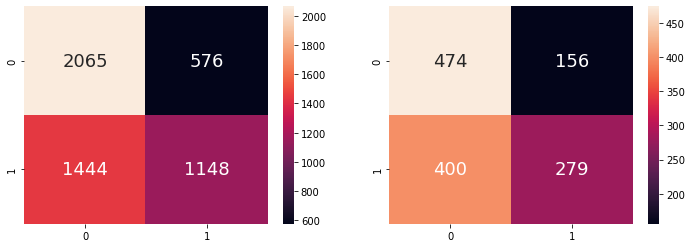

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(training_padded, isDisaster_train)   # train the decision tree model

# Predict 
y_train_pred = dectree.predict(training_padded)
y_test_pred = dectree.predict(testing_padded)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(training_padded, isDisaster_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(testing_padded,isDisaster_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(isDisaster_train, y_train_pred),
    annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(isDisaster_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Other methods : Random Forest Classifier

First, we will tune the hyperparameter using GridSearchCV from sklearn

GridSearchCV will take the following parameters:


*   Estimator - RandomForestClassifier
*   Parameters 
*   CV - signifies cross-validation folds
*   return_train_score - returns the training scores of the various models
*   n_jobs - no. of jobs to run parallely



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, classification_report
from sklearn.metrics import plot_confusion_matrix

We will pass this as a parameter to GridSearchCV to train our random forest classifier model using all possible combinations of these parameters to find the best model - stuck

In [ ]:
parameters = {'max_features':('auto','sqrt'),
              'n_estimators':[10],
              'max_depth':[None],
              'min_samples_split':[5,10,15],
              'min_samples_leaf':[1,2,5,10],
              'bootstrap':[True,False]}

In [ ]:
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 2)
modelF = forest.fit(training_padded,isDisaster_train)
y_predF = modelF.predict(testing_padded)

In [ ]:
acc_score = accuracy_score(isDisaster_test,y_predF)
pre_score = precision_score(isDisaster_test,y_predF)
rec_score = recall_score(isDisaster_test,y_predF)

In [ ]:
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)

Accuracy_score:  0.6195569136745608
Precision_score:  0.6704331450094162
Recall_score:  0.524300441826215


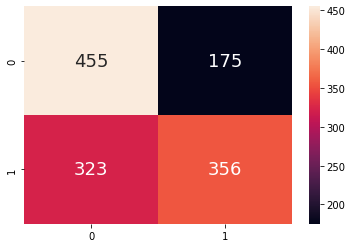

In [ ]:
sb.heatmap(confusion_matrix(isDisaster_test,y_predF),annot = True, fmt=".0f", annot_kws={"size": 18})